# Mô hình đánh điểm tín dụng khách hàng

In [1]:
# Import thư viện công cụ
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_palette('pastel') # setup bảng màu
sns.set_style('whitegrid') # setup nền biểu đồ

## Dữ liệu tín dụng khách hàng

`http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv`

In [2]:

loan_data = pd.read_csv("hmeq.csv")


In [3]:
loan_data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
loan_data.VALUE

0        39025.0
1        68400.0
2        16700.0
3            NaN
4       112000.0
          ...   
5955     90185.0
5956     92937.0
5957     92924.0
5958     91861.0
5959     88934.0
Name: VALUE, Length: 5960, dtype: float64

**Mô tả dữ liệu:**

|    |    |
|----|----|
| **BAD** | (=1) khách hàng không trả được nợ hoặc nợ quá hạn đã lâu;
|    | (=0) khách hàng trả được nợ. |
| **LOAN** | Số tiền vay của khoản nợ. |
| **MORTDUE** | Số tiền đến hạn trả nợ của khoản thế chấp hiện có. |
| **VALUE** | Giá trị của tài sản thế chấp hiện tại. |
| **REASON** | Lý do vay nợ. |
|    | DebtCon = hợp nhất nợ (Debt Consolidation); |
|    | HomeImp = sửa chữa nhà ở (Home Improvement) |
| **JOB** | Nghề nghiệp. |
| **YOJ** | Số năm làm việc cho công việc hiện tại. |
| **DEROG** | Số lượng báo cáo không tín nhiệm (báo cáo tín dụng). |
| **DELINQ** | Số lượng các khoản tín dụng bị quá hạn. |
| **CLAGE** | Tuổi của khoản vay/hạn mức tín dụng lâu đời nhất tính theo tháng. |
| **NINQ** | Số lượng truy vấn báo cáo tín dụng gần đây. |
| **CLNO** | Số lượng khoản vay/hạn mức tín dụng hiện tại. |
| **DEBTINC** | Tỷ lệ nợ trên thu nhập. |

In [6]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [7]:
loan_data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [8]:
loan_data['REASON'].value_counts(dropna = False)

DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64

In [9]:
loan_data['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

In [10]:
loan_data['JOB'].value_counts(dropna = False)

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64

## Xử lý dữ liệu bị mất/thiếu

In [11]:
# Xem tình trạng dữ liệu bị mất/thiếu
loan_data['MORTDUE'].isna().value_counts()

False    5442
True      518
Name: MORTDUE, dtype: int64

In [12]:
loan_data['MORTDUE'].mean()

73760.81719955898

In [13]:
# Xử lý dữ liệu dạng số
loan_data['MORTDUE'].fillna(loan_data['MORTDUE'].mean())

0       25860.0000
1       70053.0000
2       13500.0000
3       73760.8172
4       97800.0000
           ...    
5955    57264.0000
5956    54576.0000
5957    54045.0000
5958    50370.0000
5959    48811.0000
Name: MORTDUE, Length: 5960, dtype: float64

In [14]:
loan_data['MORTDUE']

0       25860.0
1       70053.0
2       13500.0
3           NaN
4       97800.0
         ...   
5955    57264.0
5956    54576.0
5957    54045.0
5958    50370.0
5959    48811.0
Name: MORTDUE, Length: 5960, dtype: float64

In [15]:
loan_data['MORTDUE'] = loan_data['MORTDUE'].fillna(loan_data['MORTDUE'].mean())

In [16]:
loan_data['MORTDUE'].isna().value_counts()

False    5960
Name: MORTDUE, dtype: int64

In [17]:
loan_data['REASON'].isna().value_counts(dropna=False)

False    5708
True      252
Name: REASON, dtype: int64

In [18]:
# Xử lý duwxx liệu dạng chữ
# Đánh dấu dữ liệu bị thiếu bằng giá trị "Missing" đối với dữ liệu dạng phân loại
loan_data['REASON'].isna().value_counts()

False    5708
True      252
Name: REASON, dtype: int64

In [19]:
loan_data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [20]:
loan_data['JOB'] = loan_data['JOB'].fillna("Missing")

In [21]:
loan_data['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Missing     279
Self        193
Sales       109
Name: JOB, dtype: int64

In [22]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [23]:
for col in loan_data.columns:
    if loan_data[col].dtype == 'object':
        loan_data[col] = loan_data[col].fillna('Missing')
    else:
        loan_data[col] = loan_data[col].fillna(loan_data[col].mean())

In [24]:
loan_data.sample(20)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2825,0,15800,51163.0000,157644.000000,DebtCon,ProfExe,19.000000,0.00000,0.000000,239.224789,0.000000,28.000000,20.747521
1072,1,9700,32660.0000,54536.000000,DebtCon,Office,0.000000,0.00000,0.000000,156.482106,0.000000,13.000000,67.324904
502,1,7000,73760.8172,96783.000000,HomeImp,Other,20.000000,0.25457,0.449442,179.766275,1.186055,21.296096,40.730315
4035,0,21100,48624.0000,83448.000000,Missing,Missing,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,39.671408
1431,0,10900,17282.0000,70783.000000,DebtCon,ProfExe,19.000000,0.00000,1.000000,404.904393,0.000000,11.000000,23.610124
4919,0,25900,152071.0000,185893.000000,HomeImp,Self,0.000000,0.00000,0.000000,185.543512,0.000000,16.000000,40.642279
1107,1,9900,88236.0000,104953.000000,DebtCon,ProfExe,1.000000,0.00000,0.000000,51.648705,0.000000,2.000000,28.622632
3526,0,18600,23792.0000,79716.000000,HomeImp,Other,8.922268,0.00000,0.000000,238.789837,0.000000,50.000000,42.127124
605,0,7700,53377.0000,86018.000000,HomeImp,Other,16.000000,0.00000,0.000000,187.194011,0.000000,28.000000,24.217658
3922,0,20500,87892.0000,136867.000000,DebtCon,Other,10.000000,0.00000,0.000000,96.929645,3.000000,15.000000,40.162919


In [25]:
loan_data['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Missing     252
Name: REASON, dtype: int64

In [26]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


##  vẽ biểu đồ các đặc trưng của dữ liệu


<AxesSubplot:xlabel='MORTDUE', ylabel='Count'>

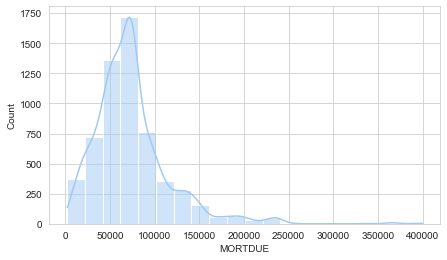

In [27]:

fig, ax = plt.subplots(figsize=(7, 4))
sns.histplot(data=loan_data,
    x='MORTDUE',
    ax=ax, 
    bins=20, 
    kde=True) 

In [28]:
loan_data['LOAN']

0        1100
1        1300
2        1500
3        1500
4        1700
        ...  
5955    88900
5956    89000
5957    89200
5958    89800
5959    89900
Name: LOAN, Length: 5960, dtype: int64

<AxesSubplot:xlabel='LOAN', ylabel='Count'>

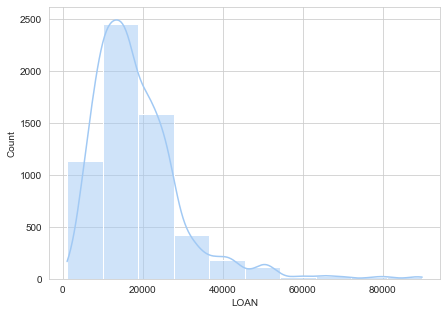

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(ax=ax, x=loan_data['LOAN'], bins=10, kde=True)

In [30]:
loan_data['REASON']

0       HomeImp
1       HomeImp
2       HomeImp
3       Missing
4       HomeImp
         ...   
5955    DebtCon
5956    DebtCon
5957    DebtCon
5958    DebtCon
5959    DebtCon
Name: REASON, Length: 5960, dtype: object

<AxesSubplot:xlabel='JOB', ylabel='count'>

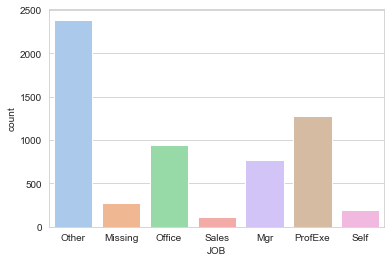

In [31]:
fig, ax = plt.subplots()
sns.countplot(ax=ax, x=loan_data['JOB'])

Plot tất cả đặc trưng lên để quan sát

In [32]:
def plot_distribution(data, col_name, bins=10, ax=None):
    plot_data = data[col_name] # --> loan_data['MORTDUE']
    ax = sns.histplot(ax=ax, x=plot_data, bins=bins, kde=True)
    title = 'Distribution of {}'.format(col_name)
    ax.set_title(title)
# histplot  --> axes
# displot --> figure

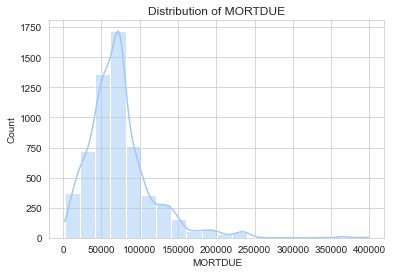

In [33]:
plot_distribution(data = loan_data, bins=20, col_name = 'MORTDUE')

In [34]:
def plot_valuecount(data, col_name, ax=None):
    plot_data = data[col_name]
    title = 'Value count of {}'.format(col_name)
    ax = sns.countplot(ax=ax, x=plot_data)
    ax.set_title(title)
 #   return ax

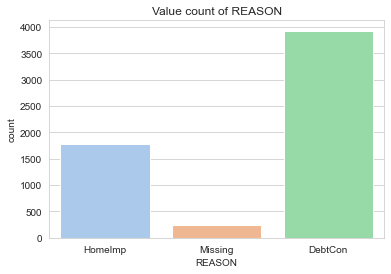

In [35]:
plot_valuecount(data = loan_data, col_name = 'REASON')

In [36]:
loan_data.columns[1:]

Index(['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [37]:
for i, col in enumerate(loan_data.columns[1:]):
    print(i, col)

0 LOAN
1 MORTDUE
2 VALUE
3 REASON
4 JOB
5 YOJ
6 DEROG
7 DELINQ
8 CLAGE
9 NINQ
10 CLNO
11 DEBTINC


Text(0.5, 0.98, 'Visualization of features')

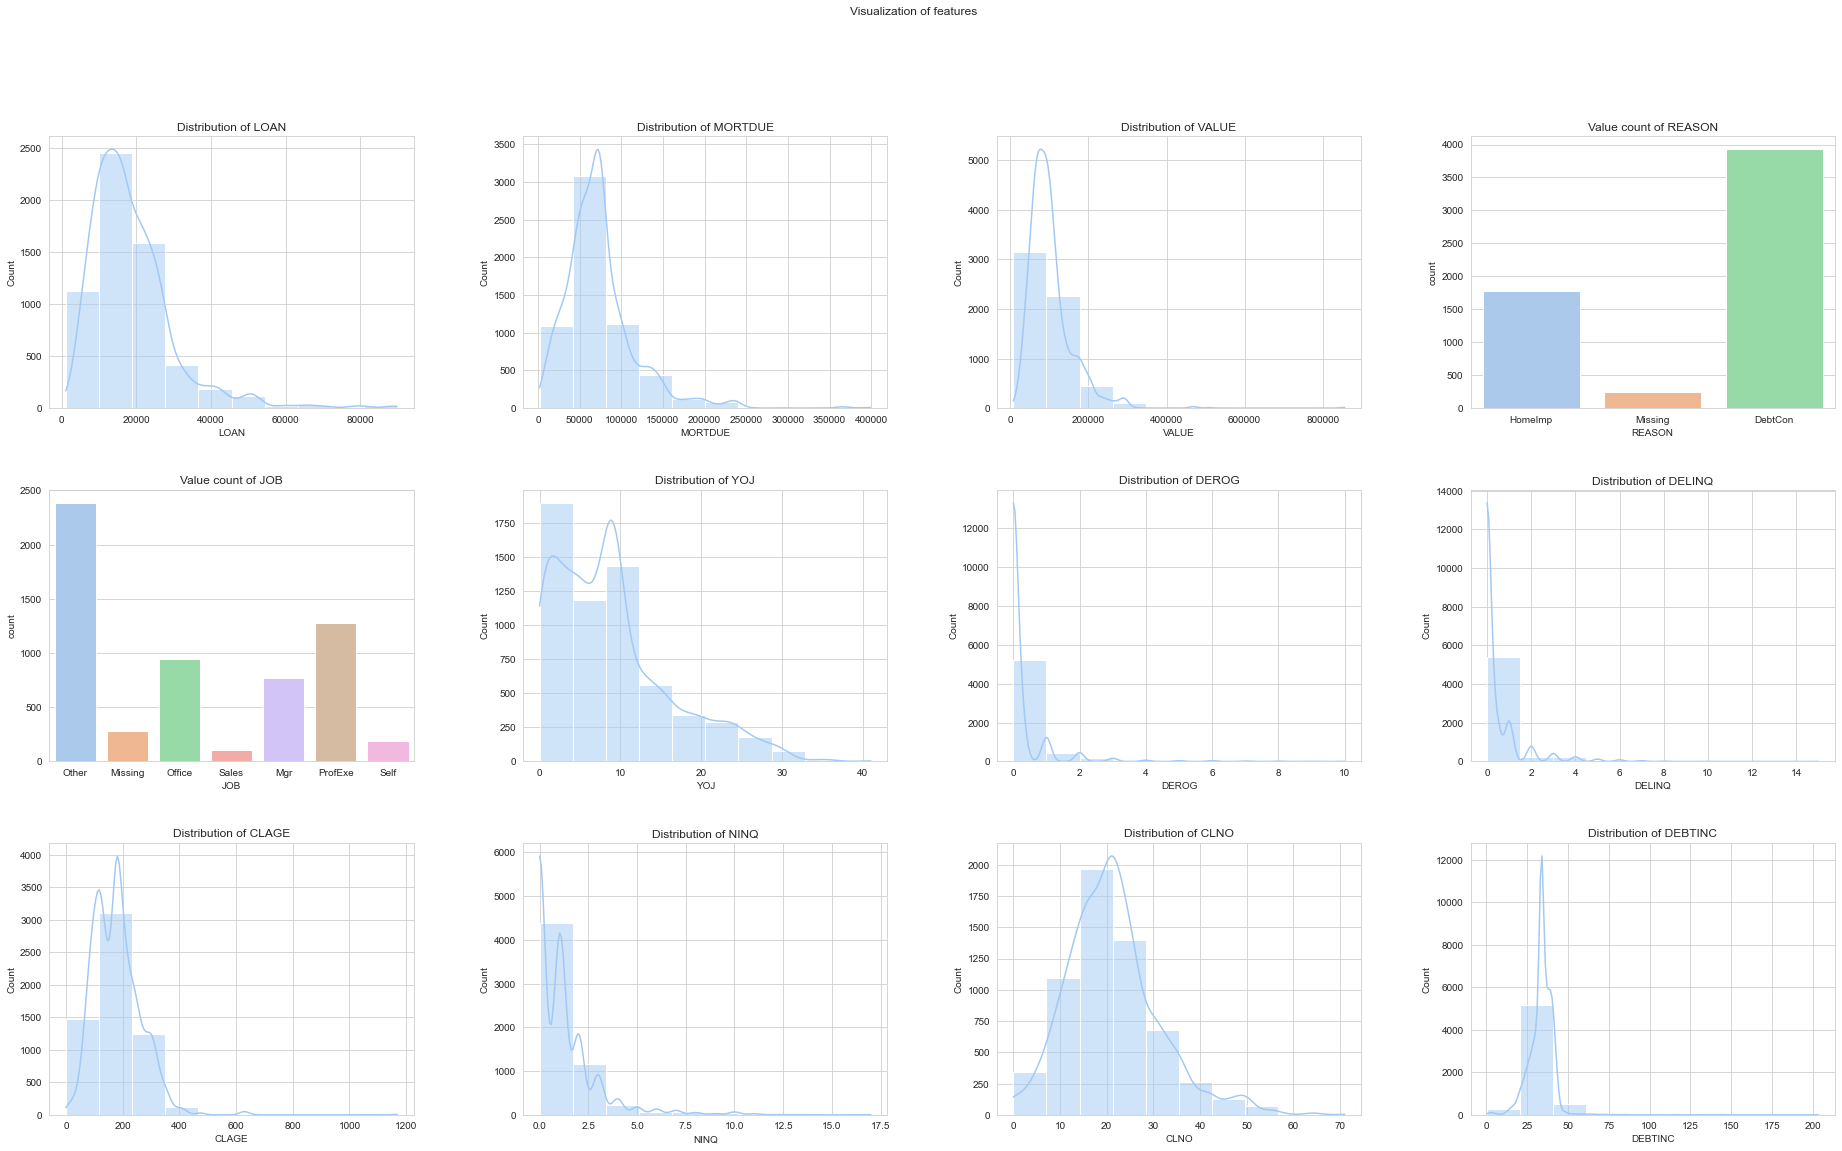

In [38]:
fig = plt.figure(figsize=(32, 18))

for i, col in enumerate(loan_data.columns[1:]):
    ax = fig.add_subplot(3, 4, i+1)
    if loan_data[col].dtypes == 'object':
        plot_valuecount(loan_data, col, ax=ax)
    else:
        plot_distribution(loan_data, col, bins=10, ax=ax)

fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Visualization of features')

<AxesSubplot:xlabel='YOJ', ylabel='BAD'>

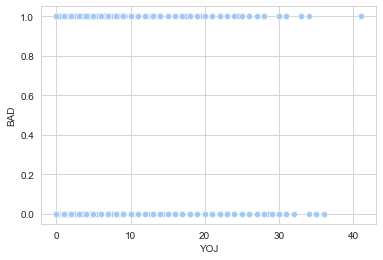

In [39]:
fig, ax = plt.subplots()
sns.scatterplot(data=loan_data, x='YOJ', y='BAD', ax=ax)

In [40]:
loan_data[['DEBTINC', 'BAD']]

,DEBTINC,BAD
0,33.779915,1
1,33.779915,1
2,33.779915,1
3,33.779915,1
4,33.779915,0
...,...,...
5955,36.112347,0
5956,35.859971,0
5957,35.556590,0
5958,34.340882,0


<AxesSubplot:xlabel='MORTDUE', ylabel='BAD'>

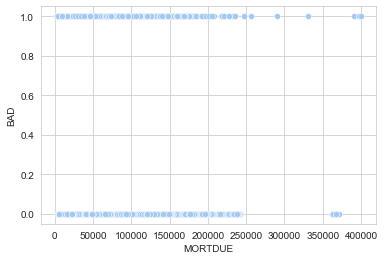

In [41]:
fig, ax = plt.subplots()
sns.scatterplot(data=loan_data, x='MORTDUE', y='BAD', ax=ax)

<AxesSubplot:xlabel='MORTDUE', ylabel='Count'>

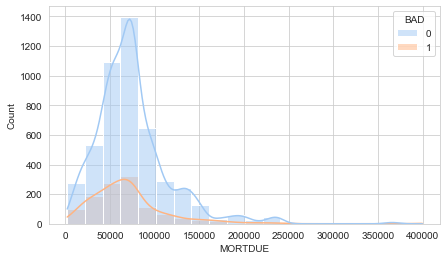

In [42]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.histplot(data=loan_data,
    x='MORTDUE',
    hue='BAD',
    ax=ax, 
    bins=20, 
    kde=True)

In [43]:
def plot_distribution_with_bad(data, col_name, col_bad, bins=10, ax=None):
    ax = sns.histplot(ax=ax, data=data, x=col_name, hue=col_bad, bins=bins, kde=True)
    title = 'Distribution of {}'.format(col_name)
    ax.set_title(title)

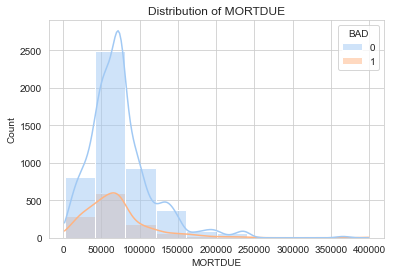

In [44]:
plot_distribution_with_bad(data=loan_data, col_name='MORTDUE', col_bad='BAD')

In [45]:
def plot_valuecount_with_bad(data, col_name, col_bad, ax=None):
    title = 'Value count of {}'.format(col_name)
    ax = sns.countplot(ax=ax, data=data, x=col_name, hue=col_bad)
    ax.set_title(title)

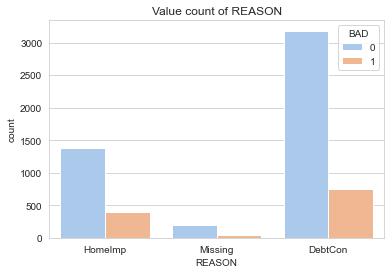

In [46]:
plot_valuecount_with_bad(data=loan_data, col_name='REASON', col_bad='BAD')

Text(0.5, 0.98, 'Visualization of features')

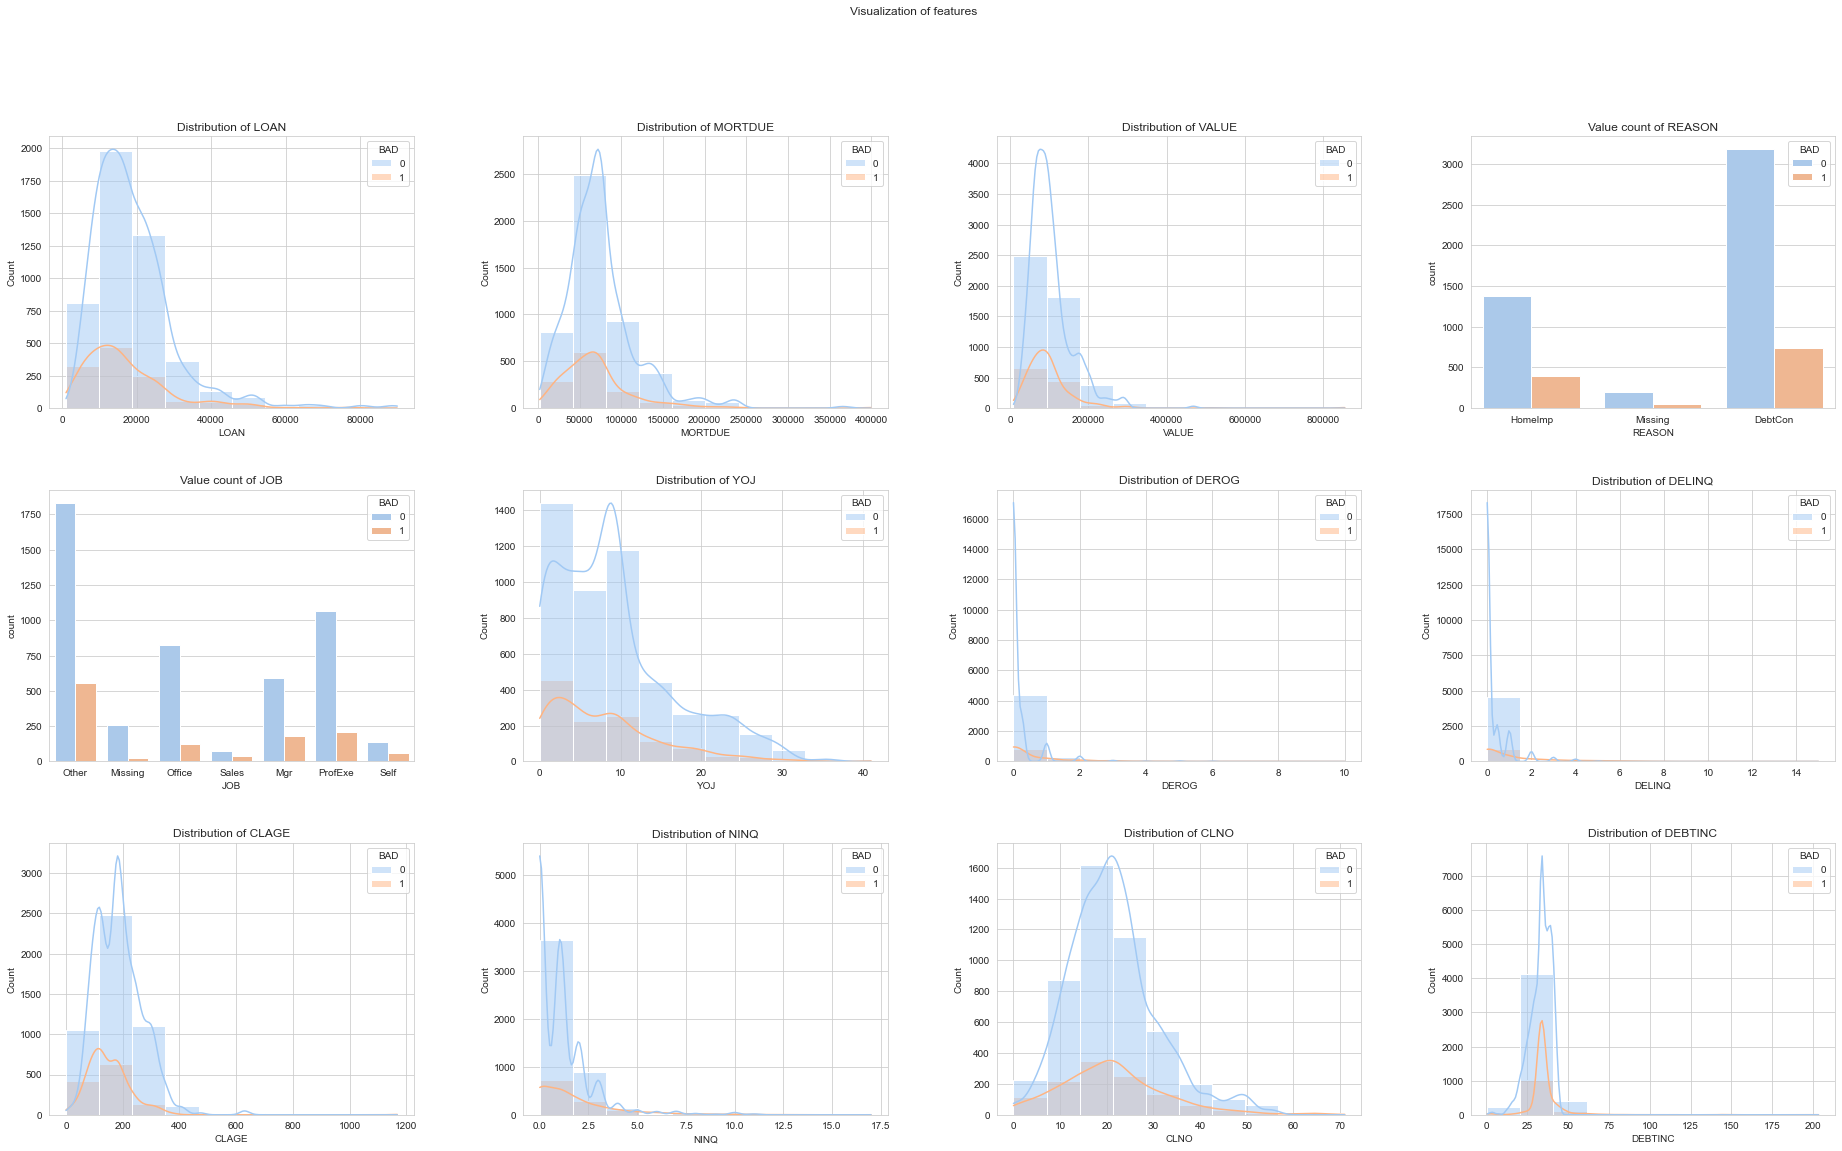

In [47]:
fig = plt.figure(figsize=(32, 18))
col_bad='BAD'

for i, col in enumerate(loan_data.columns[1:]):
    ax = fig.add_subplot(3, 4, i+1)
    if loan_data[col].dtypes == 'object':
        plot_valuecount_with_bad(loan_data, col, col_bad, ax=ax)
    else:
        plot_distribution_with_bad(loan_data, col, col_bad, bins=10, ax=ax)

fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Visualization of features')

<AxesSubplot:xlabel='REASON', ylabel='YOJ'>

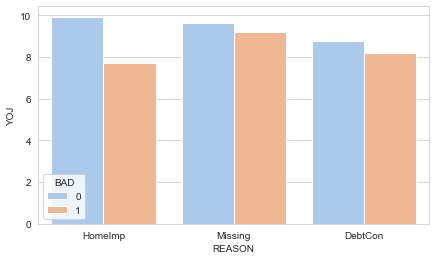

In [48]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(data=loan_data, x='REASON', y='YOJ', hue='BAD', ci=False)

<AxesSubplot:xlabel='JOB', ylabel='YOJ'>

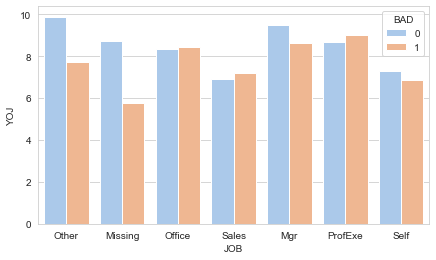

In [49]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(data=loan_data, x='JOB', y='YOJ', hue='BAD', ci=False)

<AxesSubplot:xlabel='REASON', ylabel='YOJ'>

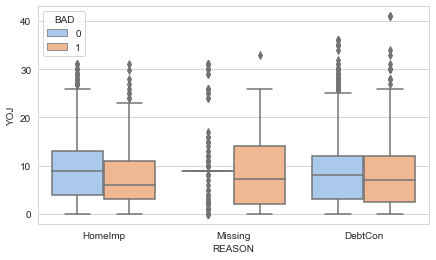

In [50]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.boxplot(data=loan_data, x='REASON', y='YOJ', hue='BAD')

In [51]:
correl = loan_data.corr()

In [52]:
correl

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.046034,-0.028852,-0.058314,0.264068,0.341472,-0.165113,0.168851,-0.004067,0.124324
LOAN,-0.075099,1.000000,0.216100,0.331862,0.100664,-0.001256,-0.033879,0.086874,0.043160,0.071804,0.074823
MORTDUE,-0.046034,0.216100,1.000000,0.779787,-0.082856,-0.044358,-0.000974,0.130757,0.029480,0.305288,0.128326
VALUE,-0.028852,0.331862,0.779787,1.000000,0.007382,-0.044744,-0.013521,0.167938,-0.004216,0.264037,0.115796
YOJ,-0.058314,0.100664,-0.082856,0.007382,1.000000,-0.059263,0.037314,0.190937,-0.067898,0.024023,-0.047642
DEROG,0.264068,-0.001256,-0.044358,-0.044744,-0.059263,1.000000,0.184901,-0.077468,0.155494,0.057948,0.011194
DELINQ,0.341472,-0.033879,-0.000974,-0.013521,0.037314,0.184901,1.000000,0.021810,0.064407,0.159105,0.029939
CLAGE,-0.165113,0.086874,0.130757,0.167938,0.190937,-0.077468,0.021810,1.000000,-0.110091,0.231595,-0.038052
NINQ,0.168851,0.043160,0.029480,-0.004216,-0.067898,0.155494,0.064407,-0.110091,1.000000,0.085148,0.109212
CLNO,-0.004067,0.071804,0.305288,0.264037,0.024023,0.057948,0.159105,0.231595,0.085148,1.000000,0.157885


<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

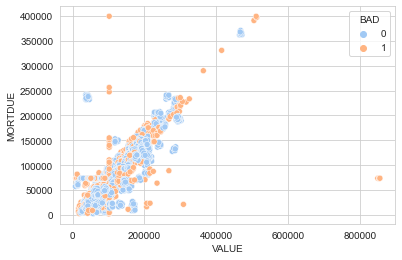

In [53]:
fig, ax = plt.subplots()
sns.scatterplot(data=loan_data, x='VALUE', y='MORTDUE', hue='BAD', ax=ax)

<AxesSubplot:>

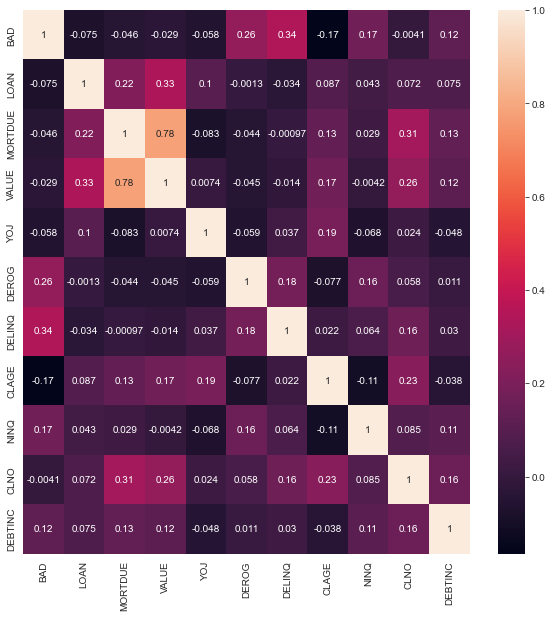

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correl, annot=True)

<AxesSubplot:>

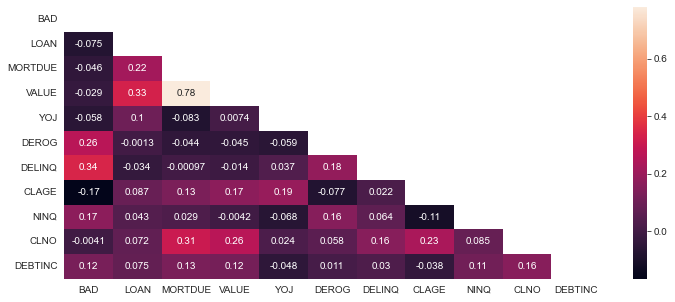

In [55]:
fig, ax = plt.subplots(figsize=(12, 5))
mask = np.zeros_like(correl)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correl, annot=True, mask=mask)

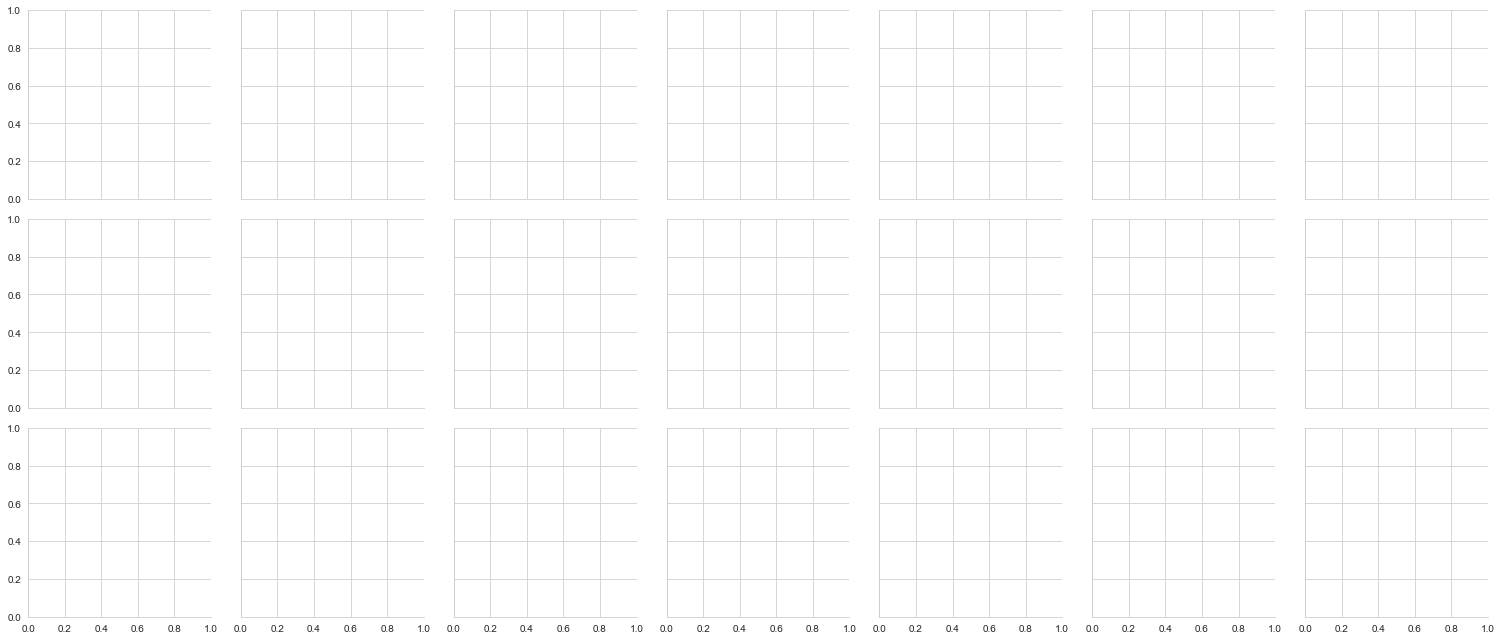

In [56]:
facet_grid = sns.FacetGrid(data=loan_data, row='REASON', col='JOB', hue='BAD')

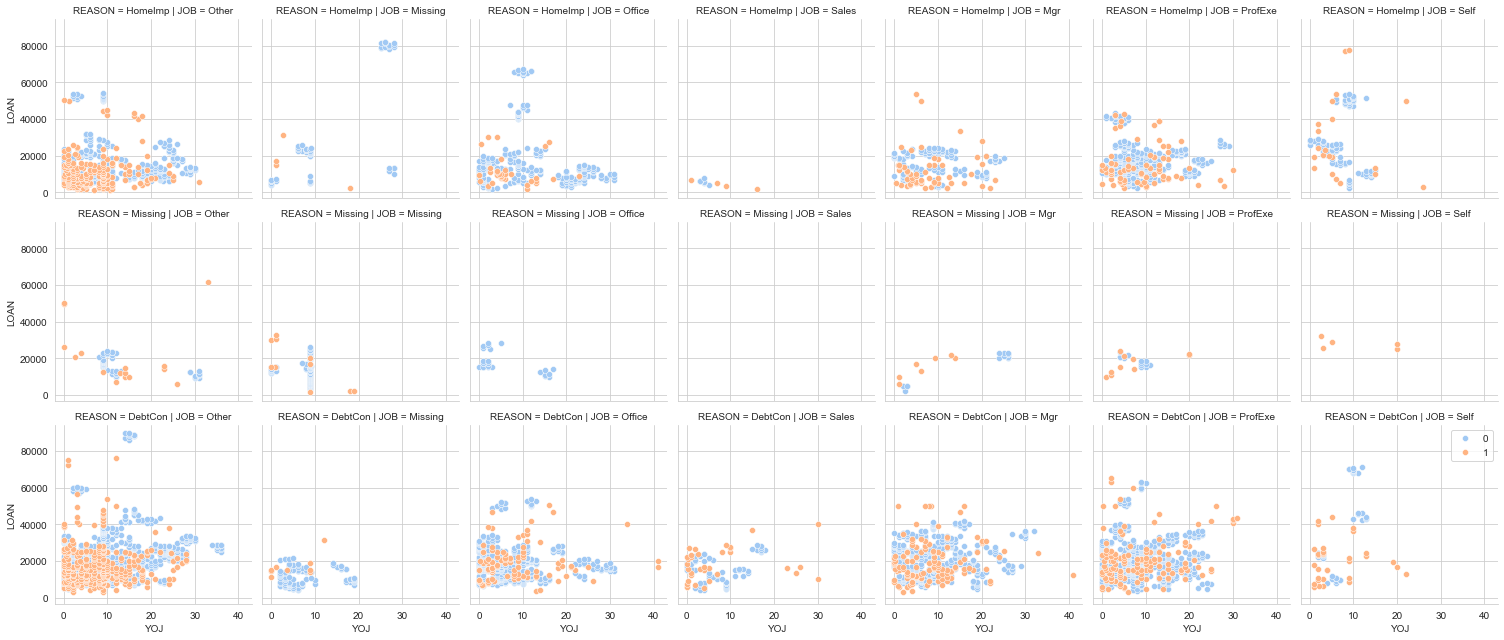

In [57]:
facet_grid = sns.FacetGrid(data=loan_data, row='REASON', col='JOB', hue='BAD')
facet_grid.map(sns.scatterplot, 'YOJ', 'LOAN')
plt.legend()

## Feature Engineering

In [58]:
loan_data = pd.read_csv("hmeq.csv")

In [59]:
loan_data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [60]:
loan_data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

### Xử lý biến liên tục

In [61]:
ser = loan_data.groupby(['REASON'])['YOJ'].apply(lambda x: x.fillna(x.mean())) # điền các giá trị bị thiếu bằng giá trị trung bình của nhóm
ser

0       10.5
1        7.0
2        4.0
4        3.0
5        9.0
        ... 
5955    16.0
5956    16.0
5957    15.0
5958    14.0
5959    15.0
Name: YOJ, Length: 5708, dtype: float64

In [62]:
loan_data['YOJ'] = ser

In [63]:
loan_data['YOJ'].isnull().sum()

252

In [64]:
for col in loan_data.columns:
    if loan_data[col].dtype != 'object':
        loan_data[col] = loan_data[col].fillna(loan_data[col].mean())

In [65]:
loan_data['YOJ'].isnull().sum()

0

### Xử lý biến rời rạc

In [66]:
for col in loan_data.columns:
    if loan_data[col].dtype == 'object':
        loan_data[col] = loan_data[col].fillna('Missing')

### Tạo biến phái sinh

In [67]:
loan_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,Missing,Missing,8.895137,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [68]:
loan_data['LOAN_BINS'] = pd.cut(loan_data['LOAN'], bins=10)

In [69]:
loan_data['LOAN_BINS']

0         (1011.2, 9980.0]
1         (1011.2, 9980.0]
2         (1011.2, 9980.0]
3         (1011.2, 9980.0]
4         (1011.2, 9980.0]
               ...        
5955    (81020.0, 89900.0]
5956    (81020.0, 89900.0]
5957    (81020.0, 89900.0]
5958    (81020.0, 89900.0]
5959    (81020.0, 89900.0]
Name: LOAN_BINS, Length: 5960, dtype: category
Categories (10, interval[float64, right]): [(1011.2, 9980.0] < (9980.0, 18860.0] < (18860.0, 27740.0] < (27740.0, 36620.0] ... (54380.0, 63260.0] < (63260.0, 72140.0] < (72140.0, 81020.0] < (81020.0, 89900.0]]

In [70]:
loan_data['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Missing     279
Self        193
Sales       109
Name: JOB, dtype: int64

In [71]:
(loan_data['REASON']=='HomeImp')&(loan_data['JOB']=='Office')

0       False
1       False
2       False
3       False
4        True
        ...  
5955    False
5956    False
5957    False
5958    False
5959    False
Length: 5960, dtype: bool

In [72]:
loan_data['HomeImp_Office'] = (loan_data['REASON']=='HomeImp')&(loan_data['JOB']=='Office')

In [73]:
loan_data['Missing_Self'] = (loan_data['REASON']=='Missing')&(loan_data['JOB']=='Self')

In [74]:
loan_data['HomeImp_Office']

0       False
1       False
2       False
3       False
4        True
        ...  
5955    False
5956    False
5957    False
5958    False
5959    False
Name: HomeImp_Office, Length: 5960, dtype: bool

In [75]:
loan_data.dtypes

BAD                  int64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
LOAN_BINS         category
HomeImp_Office        bool
Missing_Self          bool
dtype: object

In [76]:
loan_data['VALUE_P_J'] = loan_data['VALUE']/loan_data['YOJ']

In [77]:
loan_data['VALUE_P_J'] 

0        3716.666667
1        9771.428571
2        4175.000000
3       11441.762737
4       37333.333333
            ...     
5955     5636.562500
5956     5808.562500
5957     6194.933333
5958     6561.500000
5959     5928.933333
Name: VALUE_P_J, Length: 5960, dtype: float64

In [78]:
loan_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN_BINS,HomeImp_Office,Missing_Self,VALUE_P_J
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,"(1011.2, 9980.0]",False,False,3716.666667
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,"(1011.2, 9980.0]",False,False,9771.428571
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,"(1011.2, 9980.0]",False,False,4175.000000
3,1,1500,73760.8172,101776.048741,Missing,Missing,8.895137,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,"(1011.2, 9980.0]",False,False,11441.762737
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,"(1011.2, 9980.0]",True,False,37333.333333


In [79]:
loan_data.dtypes

BAD                  int64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
LOAN_BINS         category
HomeImp_Office        bool
Missing_Self          bool
VALUE_P_J          float64
dtype: object

In [80]:
loan_data['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Missing     279
Self        193
Sales       109
Name: JOB, dtype: int64

In [81]:
 from sklearn.preprocessing import LabelEncoder

In [86]:
loan_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN_BINS,HomeImp_Office,Missing_Self,VALUE_P_J
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,"(1011.2, 9980.0]",False,False,3716.666667
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,"(1011.2, 9980.0]",False,False,9771.428571
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,"(1011.2, 9980.0]",False,False,4175.000000
3,1,1500,73760.8172,101776.048741,Missing,Missing,8.895137,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,"(1011.2, 9980.0]",False,False,11441.762737
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,"(1011.2, 9980.0]",True,False,37333.333333


In [82]:
col_labels_encoder = ['REASON']

In [83]:
le = LabelEncoder()

In [84]:
df = loan_data.copy()

In [89]:
df['REASON'] = le.fit_transform(df['REASON'])

In [90]:
df[col_labels_encoder].value_counts()

REASON
0         3928
1         1780
2          252
dtype: int64

In [91]:
col_one_hot_encoder = ['JOB', 'LOAN_BINS', 'HomeImp_Office']

In [92]:
df = pd.get_dummies(df, columns=col_one_hot_encoder)

In [93]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,"LOAN_BINS_(18860.0, 27740.0]","LOAN_BINS_(27740.0, 36620.0]","LOAN_BINS_(36620.0, 45500.0]","LOAN_BINS_(45500.0, 54380.0]","LOAN_BINS_(54380.0, 63260.0]","LOAN_BINS_(63260.0, 72140.0]","LOAN_BINS_(72140.0, 81020.0]","LOAN_BINS_(81020.0, 89900.0]",HomeImp_Office_False,HomeImp_Office_True
0,1,1100,25860.0000,39025.000000,1,10.500000,0.00000,0.000000,94.366667,1.000000,...,0,0,0,0,0,0,0,0,1,0
1,1,1300,70053.0000,68400.000000,1,7.000000,0.00000,2.000000,121.833333,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,1,1500,13500.0000,16700.000000,1,4.000000,0.00000,0.000000,149.466667,1.000000,...,0,0,0,0,0,0,0,0,1,0
3,1,1500,73760.8172,101776.048741,2,8.895137,0.25457,0.449442,179.766275,1.186055,...,0,0,0,0,0,0,0,0,1,0
4,0,1700,97800.0000,112000.000000,1,3.000000,0.00000,0.000000,93.333333,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [94]:
df.dtypes

BAD                               int64
LOAN                              int64
MORTDUE                         float64
VALUE                           float64
REASON                            int64
YOJ                             float64
DEROG                           float64
DELINQ                          float64
CLAGE                           float64
NINQ                            float64
CLNO                            float64
DEBTINC                         float64
Missing_Self                       bool
VALUE_P_J                       float64
JOB_Mgr                           uint8
JOB_Missing                       uint8
JOB_Office                        uint8
JOB_Other                         uint8
JOB_ProfExe                       uint8
JOB_Sales                         uint8
JOB_Self                          uint8
LOAN_BINS_(1011.2, 9980.0]        uint8
LOAN_BINS_(9980.0, 18860.0]       uint8
LOAN_BINS_(18860.0, 27740.0]      uint8
LOAN_BINS_(27740.0, 36620.0]      uint8


In [95]:
df['YOJ'].min()

0.0

In [96]:
df['VALUE'].min()

8000.0

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
col_min_max_scaler = [i for i in loan_data.columns if (i not in col_one_hot_encoder)&(i not in col_labels_encoder)&(i != 'BAD')]

In [100]:
col_min_max_scaler = ['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [101]:
df[col_min_max_scaler] = scaler.fit_transform(df[col_min_max_scaler])

In [102]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'Missing_Self', 'VALUE_P_J',
       'JOB_Mgr', 'JOB_Missing', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe',
       'JOB_Sales', 'JOB_Self', 'LOAN_BINS_(1011.2, 9980.0]',
       'LOAN_BINS_(9980.0, 18860.0]', 'LOAN_BINS_(18860.0, 27740.0]',
       'LOAN_BINS_(27740.0, 36620.0]', 'LOAN_BINS_(36620.0, 45500.0]',
       'LOAN_BINS_(45500.0, 54380.0]', 'LOAN_BINS_(54380.0, 63260.0]',
       'LOAN_BINS_(63260.0, 72140.0]', 'LOAN_BINS_(72140.0, 81020.0]',
       'LOAN_BINS_(81020.0, 89900.0]', 'HomeImp_Office_False',
       'HomeImp_Office_True'],
      dtype='object')

In [103]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,"LOAN_BINS_(18860.0, 27740.0]","LOAN_BINS_(27740.0, 36620.0]","LOAN_BINS_(36620.0, 45500.0]","LOAN_BINS_(45500.0, 54380.0]","LOAN_BINS_(54380.0, 63260.0]","LOAN_BINS_(63260.0, 72140.0]","LOAN_BINS_(72140.0, 81020.0]","LOAN_BINS_(81020.0, 89900.0]",HomeImp_Office_False,HomeImp_Office_True
0,1,0.000000,0.059869,0.036590,1,0.256098,0.000000,0.000000,0.080777,0.058824,...,0,0,0,0,0,0,0,0,1,0
1,1,0.002252,0.171050,0.071234,1,0.170732,0.000000,0.133333,0.104289,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,1,0.004505,0.028773,0.010261,1,0.097561,0.000000,0.000000,0.127942,0.058824,...,0,0,0,0,0,0,0,0,1,0
3,1,0.004505,0.180378,0.110597,2,0.216955,0.025457,0.029963,0.153879,0.069768,...,0,0,0,0,0,0,0,0,1,0
4,0,0.006757,0.240856,0.122655,1,0.073171,0.000000,0.000000,0.079893,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [104]:
df['YOJ'].max()

1.0

In [105]:
df = df.drop('VALUE_P_J', axis=1)

In [106]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,"LOAN_BINS_(18860.0, 27740.0]","LOAN_BINS_(27740.0, 36620.0]","LOAN_BINS_(36620.0, 45500.0]","LOAN_BINS_(45500.0, 54380.0]","LOAN_BINS_(54380.0, 63260.0]","LOAN_BINS_(63260.0, 72140.0]","LOAN_BINS_(72140.0, 81020.0]","LOAN_BINS_(81020.0, 89900.0]",HomeImp_Office_False,HomeImp_Office_True
0,1,0.000000,0.059869,0.036590,1,0.256098,0.000000,0.000000,0.080777,0.058824,...,0,0,0,0,0,0,0,0,1,0
1,1,0.002252,0.171050,0.071234,1,0.170732,0.000000,0.133333,0.104289,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,1,0.004505,0.028773,0.010261,1,0.097561,0.000000,0.000000,0.127942,0.058824,...,0,0,0,0,0,0,0,0,1,0
3,1,0.004505,0.180378,0.110597,2,0.216955,0.025457,0.029963,0.153879,0.069768,...,0,0,0,0,0,0,0,0,1,0
4,0,0.006757,0.240856,0.122655,1,0.073171,0.000000,0.000000,0.079893,0.000000,...,0,0,0,0,0,0,0,0,0,1
5,1,0.006757,0.071663,0.038117,1,0.219512,0.000000,0.000000,0.086854,0.058824,...,0,0,0,0,0,0,0,0,1,0
6,1,0.007883,0.117201,0.057833,1,0.121951,0.300000,0.133333,0.065997,0.058824,...,0,0,0,0,0,0,0,0,1,0
7,1,0.007883,0.066515,0.041318,1,0.268293,0.000000,0.000000,0.075983,0.000000,...,0,0,0,0,0,0,0,0,1,0
8,1,0.010135,0.077077,0.045689,1,0.073171,0.000000,0.133333,0.185693,0.058824,...,0,0,0,0,0,0,0,0,1,0
9,1,0.010135,0.180378,0.063981,1,0.390244,0.000000,0.000000,0.099124,0.000000,...,0,0,0,0,0,0,0,0,1,0


In [107]:
X = df.drop('BAD', axis=1)
y = df['BAD']

In [108]:
X.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,"LOAN_BINS_(18860.0, 27740.0]","LOAN_BINS_(27740.0, 36620.0]","LOAN_BINS_(36620.0, 45500.0]","LOAN_BINS_(45500.0, 54380.0]","LOAN_BINS_(54380.0, 63260.0]","LOAN_BINS_(63260.0, 72140.0]","LOAN_BINS_(72140.0, 81020.0]","LOAN_BINS_(81020.0, 89900.0]",HomeImp_Office_False,HomeImp_Office_True
0,0.000000,0.059869,0.036590,1,0.256098,0.000000,0.000000,0.080777,0.058824,0.126761,...,0,0,0,0,0,0,0,0,1,0
1,0.002252,0.171050,0.071234,1,0.170732,0.000000,0.133333,0.104289,0.000000,0.197183,...,0,0,0,0,0,0,0,0,1,0
2,0.004505,0.028773,0.010261,1,0.097561,0.000000,0.000000,0.127942,0.058824,0.140845,...,0,0,0,0,0,0,0,0,1,0
3,0.004505,0.180378,0.110597,2,0.216955,0.025457,0.029963,0.153879,0.069768,0.299945,...,0,0,0,0,0,0,0,0,1,0
4,0.006757,0.240856,0.122655,1,0.073171,0.000000,0.000000,0.079893,0.000000,0.197183,...,0,0,0,0,0,0,0,0,0,1


In [109]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64

## 3. Xây dựng mô hình

In [110]:
from sklearn.model_selection import train_test_split 

**Tách dữ liệu thành 2 phần**

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
X_train

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,"LOAN_BINS_(18860.0, 27740.0]","LOAN_BINS_(27740.0, 36620.0]","LOAN_BINS_(36620.0, 45500.0]","LOAN_BINS_(45500.0, 54380.0]","LOAN_BINS_(54380.0, 63260.0]","LOAN_BINS_(63260.0, 72140.0]","LOAN_BINS_(72140.0, 81020.0]","LOAN_BINS_(81020.0, 89900.0]",HomeImp_Office_False,HomeImp_Office_True
738,0.079955,0.028502,0.030963,0,0.073171,0.0,0.000000,0.229337,0.000000,0.154930,...,0,0,0,0,0,0,0,0,1,0
3700,0.207207,0.018647,0.025946,0,0.000000,0.1,0.000000,0.028647,0.117647,0.056338,...,1,0,0,0,0,0,0,0,1,0
5225,0.306306,0.258969,0.163933,0,0.268293,0.0,0.000000,0.138985,0.058824,0.239437,...,0,1,0,0,0,0,0,0,1,0
5241,0.307432,0.455992,0.264586,0,0.024390,0.0,0.000000,0.257572,0.058824,0.450704,...,0,1,0,0,0,0,0,0,1,0
1502,0.112613,0.259538,0.135511,0,0.073171,0.0,0.000000,0.097317,0.058824,0.366197,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,0.358108,0.580469,0.337240,0,0.317073,0.0,0.066667,0.235994,0.058824,0.366197,...,0,1,0,0,0,0,0,0,1,0
4651,0.262387,0.229814,0.155714,1,0.146341,0.0,0.000000,0.151948,0.000000,0.450704,...,1,0,0,0,0,0,0,0,1,0
5845,0.560811,0.101835,0.071332,0,0.121951,0.1,0.029963,0.155269,0.058824,0.211268,...,0,0,0,1,0,0,0,0,1,0
5339,0.326577,0.191355,0.127702,0,0.243902,0.0,0.000000,0.063132,0.058824,0.492958,...,0,1,0,0,0,0,0,0,1,0


In [113]:
X_test

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,"LOAN_BINS_(18860.0, 27740.0]","LOAN_BINS_(27740.0, 36620.0]","LOAN_BINS_(36620.0, 45500.0]","LOAN_BINS_(45500.0, 54380.0]","LOAN_BINS_(54380.0, 63260.0]","LOAN_BINS_(63260.0, 72140.0]","LOAN_BINS_(72140.0, 81020.0]","LOAN_BINS_(81020.0, 89900.0]",HomeImp_Office_False,HomeImp_Office_True
2854,0.166667,0.092574,0.071838,0,0.219512,0.0,0.000000,0.214792,0.058824,0.225352,...,0,0,0,0,0,0,0,0,1,0
5608,0.413288,0.073338,0.059301,0,0.210542,0.0,0.000000,0.153879,0.411765,0.000000,...,0,0,1,0,0,0,0,0,1,0
676,0.077703,0.153688,0.110597,0,0.219512,0.1,0.066667,0.113761,0.058824,0.366197,...,0,0,0,0,0,0,0,0,1,0
2586,0.156532,0.100489,0.110597,0,0.243902,0.0,0.066667,0.064485,0.000000,0.464789,...,0,0,0,0,0,0,0,0,1,0
1356,0.106982,0.112982,0.085088,1,0.292683,0.3,0.000000,0.209062,0.117647,0.408451,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.077703,0.192854,0.092935,0,0.002439,0.4,0.000000,0.153879,0.000000,0.056338,...,0,0,0,0,0,0,0,0,1,0
5112,0.296171,0.180378,0.037572,0,0.268293,0.1,0.029963,0.074796,0.069768,0.197183,...,1,0,0,0,0,0,0,0,1,0
381,0.059685,0.113684,0.059154,1,0.000000,0.0,0.029963,0.089702,0.069768,0.183099,...,0,0,0,0,0,0,0,0,1,0
3367,0.189189,0.162924,0.098690,0,0.000000,0.0,0.000000,0.076557,0.000000,0.253521,...,0,0,0,0,0,0,0,0,1,0


In [114]:
y_train

738     0
3700    0
5225    0
5241    0
1502    0
       ..
5467    0
4651    0
5845    0
5339    0
1631    1
Name: BAD, Length: 4768, dtype: int64

In [115]:
y_test

2854    0
5608    0
676     1
2586    1
1356    0
       ..
666     0
5112    0
381     0
3367    0
3609    0
Name: BAD, Length: 1192, dtype: int64

# Model


In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)


LogisticRegression()

In [118]:
X_train.columns

Index(['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'Missing_Self', 'JOB_Mgr', 'JOB_Missing',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self',
       'LOAN_BINS_(1011.2, 9980.0]', 'LOAN_BINS_(9980.0, 18860.0]',
       'LOAN_BINS_(18860.0, 27740.0]', 'LOAN_BINS_(27740.0, 36620.0]',
       'LOAN_BINS_(36620.0, 45500.0]', 'LOAN_BINS_(45500.0, 54380.0]',
       'LOAN_BINS_(54380.0, 63260.0]', 'LOAN_BINS_(63260.0, 72140.0]',
       'LOAN_BINS_(72140.0, 81020.0]', 'LOAN_BINS_(81020.0, 89900.0]',
       'HomeImp_Office_False', 'HomeImp_Office_True'],
      dtype='object')

In [119]:
logReg.coef_, logReg.intercept_

(array([[-2.29538498e+00, -8.40553825e-01,  1.17587734e+00,
          2.09532041e-01, -3.16639580e-01,  4.87364405e+00,
          7.55307885e+00, -4.14928651e+00,  2.53303086e+00,
         -6.73420537e-01,  3.93407410e+00,  1.03944863e+00,
          3.64897973e-02, -1.16084478e+00, -3.25483668e-01,
          1.37604225e-01, -1.50515910e-02,  8.98494467e-01,
          4.28454396e-01, -3.52979053e-01, -6.17390143e-01,
         -6.29400175e-01, -5.83138400e-01,  3.69126455e-01,
          3.94564782e-01,  4.78592812e-01,  4.74702529e-03,
          1.26382021e+00, -3.28280667e-01,  3.00887197e-01,
         -3.01224348e-01]]),
 array([-1.22860945]))

In [120]:
logReg.predict_proba(X_test)[:, 1]

array([0.07730496, 0.40856773, 0.41978145, ..., 0.37925359, 0.12733212,
       0.14869086])

In [121]:
logReg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
y_test_hat = logReg.predict(X_test)
p_y_test_hat = logReg.predict_proba(X_test)[:,1]

In [123]:
y_test_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
y_test.values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [125]:
sum((y_test_hat - y_test.values)**2)

204

In [126]:
len(y_test)

1192

In [127]:
(1192-206)/1192*100

82.71812080536914

In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
confusion_matrix(y_test,y_test_hat)

array([[934,  19],
       [185,  54]], dtype=int64)

In [130]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, p_y_test_hat)

In [131]:
print(thresholds)

[1.97022639 0.97022639 0.83787533 0.82932348 0.77572586 0.77471365
 0.76497967 0.76295653 0.75746727 0.7553777  0.74163634 0.72614629
 0.69451432 0.68221143 0.66279533 0.65246922 0.65144434 0.62145017
 0.61365434 0.60732495 0.5906998  0.58835632 0.58424073 0.57972271
 0.56076417 0.55755507 0.52214066 0.51989251 0.51354303 0.50735407
 0.49756934 0.49367375 0.49199528 0.48512559 0.46173261 0.46099203
 0.45141155 0.44990896 0.43855007 0.42349591 0.41804046 0.41303156
 0.41041786 0.40856773 0.40462347 0.40420086 0.40080697 0.40079812
 0.39739258 0.39135734 0.38706966 0.38657568 0.38384895 0.38240646
 0.3810955  0.37925359 0.37783459 0.37319683 0.37037253 0.3670106
 0.36549799 0.3638141  0.36353946 0.36167446 0.35348487 0.35292169
 0.34642798 0.34558443 0.34382818 0.34157105 0.33888933 0.3367235
 0.33409134 0.33358079 0.33269287 0.32690834 0.32669371 0.32580845
 0.32261406 0.32233871 0.32213226 0.32107492 0.32025996 0.31533644
 0.31453954 0.31427885 0.31167675 0.3087418  0.3082822  0.303228

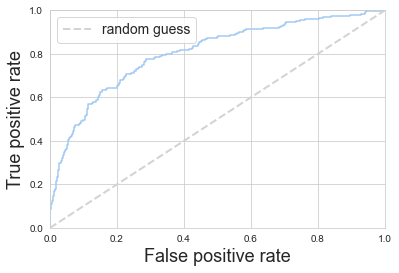

In [132]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, p_y_test_hat)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [133]:
from sklearn.metrics import auc

In [134]:
print('AUC is: ', auc(fpr,tpr))

AUC is:  0.8046205113119987


In [151]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [152]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [137]:
from sklearn import tree

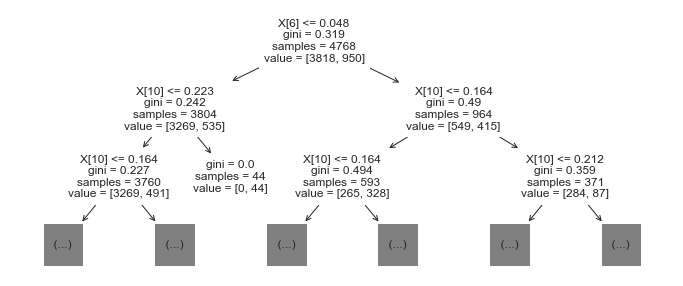

In [153]:
plt.figure(figsize=(12,5))
tree.plot_tree(model_tree, max_depth=2)
plt.show()

In [154]:
y_hat_proba = model_tree.predict_proba(X_test)[:, 1]

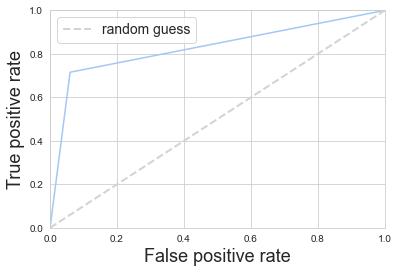

AUC is:  0.8278350243889588


In [155]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
print('AUC is: ', auc(fpr, tpr))

In [161]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [162]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

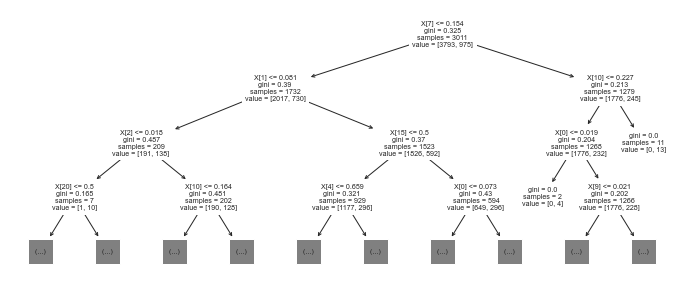

In [163]:
plt.figure(figsize=(12,5))
tree.plot_tree(model_rf.estimators_[12], max_depth=3)
plt.show()

In [164]:
y_hat_proba = model_rf.predict_proba(X_test)[:, 1]

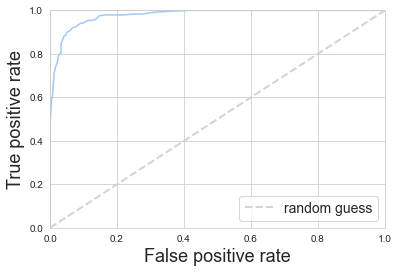

AUC is:  0.9788489991965473


In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
print('AUC is: ', auc(fpr, tpr))

In [148]:
from sklearn import svm

In [167]:
model_svm = svm.SVC(probability=True)
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
model_svm.fit(X_train, y_train)

SVC(probability=True)

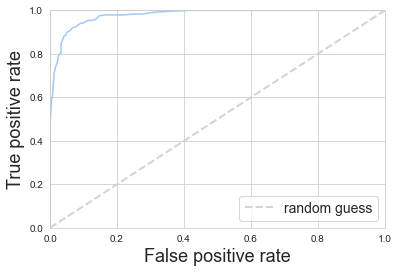

AUC is:  0.9788489991965473


In [168]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
print('AUC is: ', auc(fpr, tpr))

# Danh gia


In [170]:
from sklearn.metrics import f1_score

In [190]:
def compute_f1_test(model):   
    ypred = model.predict(X_test)
    return f1_score(y_test,ypred)
def compute_f1_train(model):   
    ypred = model.predict(X_train)
    return f1_score(y_train,ypred)

In [191]:
compute_f1_train(logReg),compute_f1_test(logReg) 

(0.36306235201262826, 0.34615384615384615)

In [193]:
compute_f1_train(model_tree),compute_f1_test(model_tree)

(1.0, 0.7323340471092078)

In [194]:
compute_f1_train(model_rf),compute_f1_test(model_rf)

(1.0, 0.8095238095238095)

In [195]:
compute_f1_train(model_svm),compute_f1_test(model_svm)

(0.3002680965147453, 0.29285714285714287)

# Tuning SVM

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
parameters ={
    'kernel':('linear','rbf','poly'),
    'C' :  [0.001,0.01,0.1,1,10]
}
svm = svm.SVC()
clf = GridSearchCV(svm,
                  param_grid=parameters,
                  cv=5,
                  scoring='f1')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='f1')

In [185]:
grid_df = pd.DataFrame(clf.cv_results_)

In [187]:
clf.best_score_

0.5419228251508249

In [188]:
clf.best_params_

{'C': 10, 'kernel': 'poly'}